# <center> Раздел 2. Модуль 5. Визуализация данных

In [1]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## <center> Графические возможности библиотеки matplotlib

Matplotlib - это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

In [5]:
#!pip install matplotlib

За визуализацию графиков в matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. К тому же для более корректного отображения графиков в Jupiter используется команда %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Библиотека позволяет работать в нескольких режимах. Самый распространенный и мощный по функционалу - объектно-ориентированный режим. Он основан на работе с объектами фигур (figure), их еще называют канвасами или холстами, и координатных плоскостей (axes) или системы координат. 

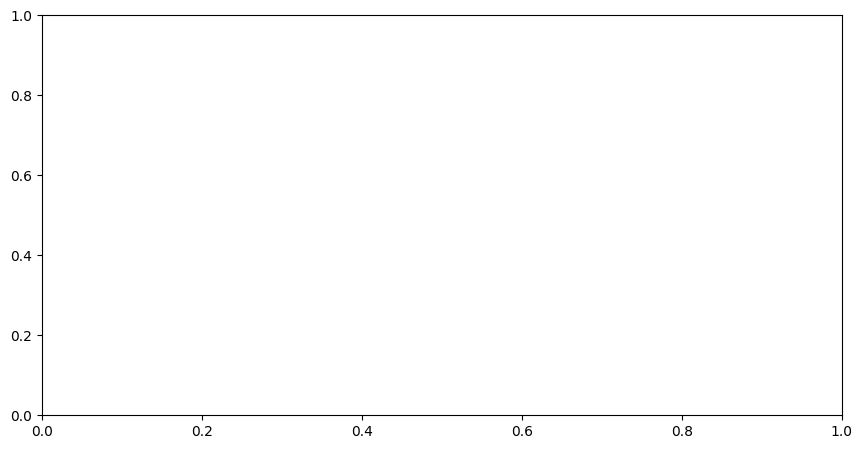

In [3]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])

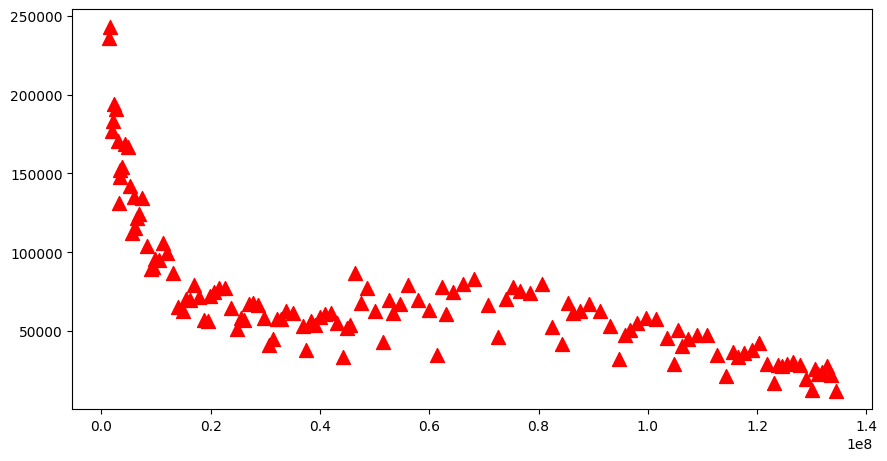

In [11]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='^',
    c = 'red'
);

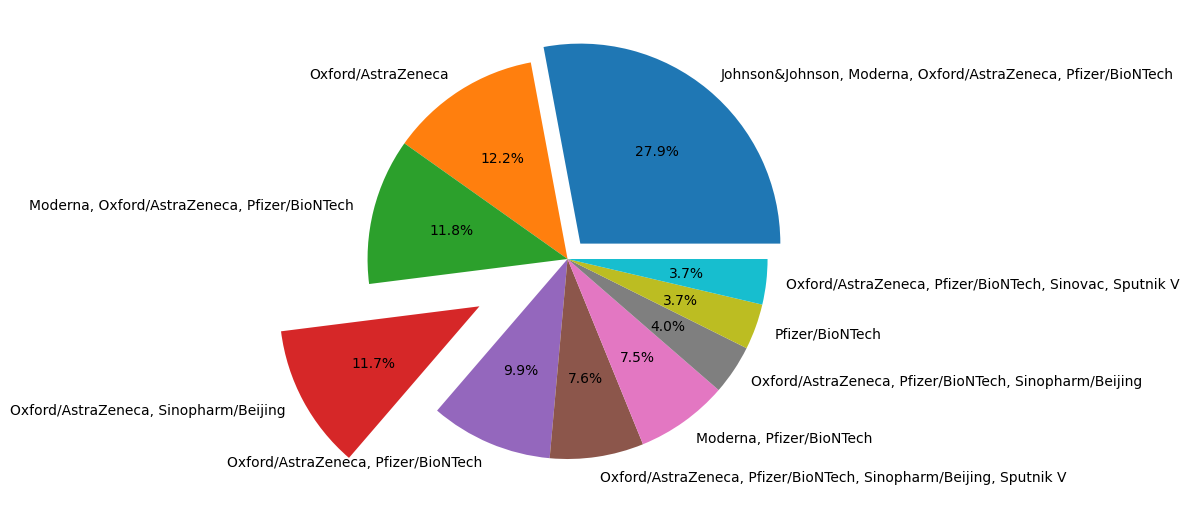

In [13]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(                                      #круг
    vaccine_combinations,                      # где берем
    labels=vaccine_combinations.index,         # что берем
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0.5, 0, 0, 0, 0, 0, 0]# вылет
);

Вы наверное заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нем изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно, вы всегда сможете подсмотреть их в документации):

* axes.set_title() - заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта)
* axes.set_xlabel() - название оси абсцисс
* axes.set_ylabel() - название оси ординат
* axes.set_xticks() - установка отметок на оси абсцисс
* axes.set_yticks() - установка отметок на оси ординат
* axes.xaxis.set_tick_params() - управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах)
* axes.yaxis.set_tick_params()  - управление параметрами отметок на оси ординат
* axes.legend() - отображение легенды
* axes.grid() - установка сетки


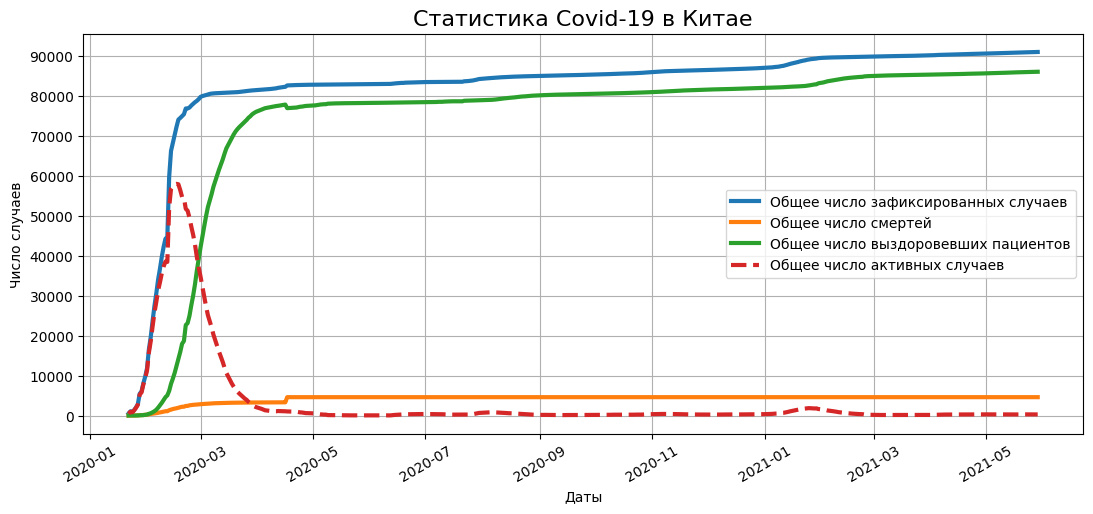

In [14]:
china_data = covid_df[covid_df['country'] == 'China'].sort_values(by='date')
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)      # поворот надписи
axes.grid()
axes.legend();

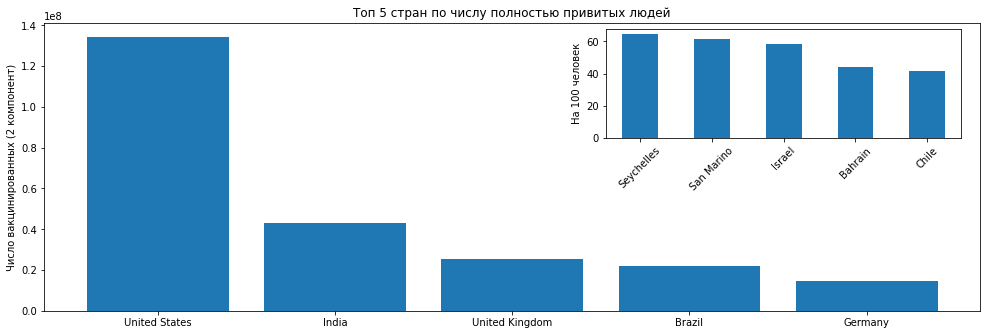

In [9]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = vacc_country.index,
    height = vacc_country,
    );
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(
    x = vacc_country_per_hundred.index,
    height = vacc_country_per_hundred,
    width=0.5
    );
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

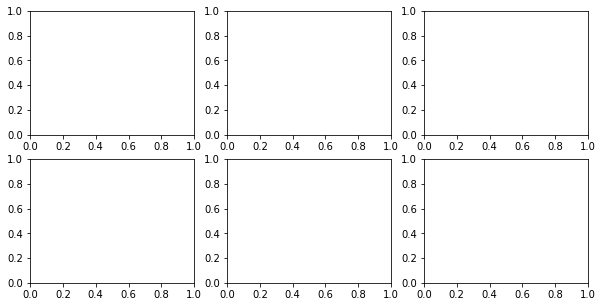

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

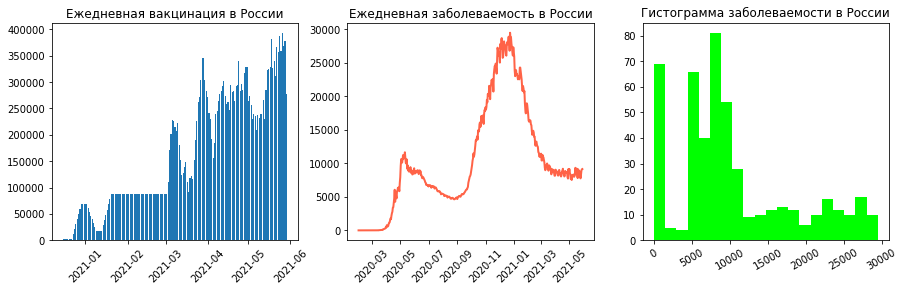

In [15]:
russia_data = covid_df[covid_df['country'] == 'Russia']

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#столбчатая диаграмма
axes[0].bar(x=russia_data['date'], 
            height=russia_data['daily_vaccinations'],
            label='Число вакцинированных')
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

#линейный график
axes[1].plot(russia_data['date'],
             russia_data['daily_confirmed'],
             label='Число заболевших',
             color='tomato', lw=2)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

#гистограмма
axes[2].hist(x=russia_data['daily_confirmed'],
             label=['Число заболевших'], 
             color='lime', bins = 20)
axes[2].set_title('Гистограмма заболеваемости в России');
axes[2].xaxis.set_tick_params(rotation=30)